In [7]:
import             pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file
df = pd.read_csv("./plants_thermal_input_data_final.csv")

print("Original df shape:", df.shape)

# Display the dataframe
df.head(10)

Original df shape: (1560, 16)


,NEONSite,FluxnetSite,Year,Month,NEON_PAR,GrowingSeason,MODIS_FPAR,MODIS_GPP,MODIS_NPP,MODIS_CUE,MODIS_ET,MODIS_PET,Ameriflux_Precipitation,Ameriflux_NEE,Ameriflux_RE,Ameriflux_GPP
0,ABBY,US-xAB,2019,1,234.266082,0,0.511250,15812.0,NaN,NaN,NaN,NaN,5.525,0.985518,1.87615,1.080930
1,ABBY,US-xAB,2019,2,158.791374,0,0.312857,NaN,NaN,NaN,NaN,NaN,8.037,1.062960,1.42750,0.354154
2,ABBY,US-xAB,2019,3,274.517711,1,0.588750,NaN,NaN,NaN,NaN,NaN,2.682,-0.093046,3.11090,3.265210
3,ABBY,US-xAB,2019,4,239.743986,1,0.370000,NaN,NaN,NaN,NaN,NaN,7.601,0.311318,4.95291,4.502570
4,ABBY,US-xAB,2019,5,371.709899,1,0.695000,NaN,NaN,NaN,NaN,NaN,2.044,-0.352640,6.97303,7.388660


(-10.0, 10.0)

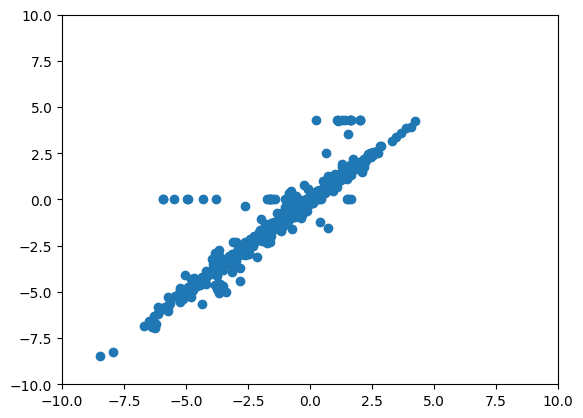

In [41]:
plt.scatter(df['Ameriflux_NEE'], df['Ameriflux_RE'] - df['Ameriflux_GPP'])
plt.xlim(-10,10)
plt.ylim(-10,10)

In [42]:
# Calculate Aridity Index using MODIS_PET divided by Ameriflux_Precipitation

df["AI_C"] = df["MODIS_PET"] / df["Ameriflux_Precipitation"]

# Calculate Ameriflux-based NPP using MODIS CUE and Ameriflux GPP, and store it in a new column
df["Ameriflux_NPP_C"] = df["MODIS_CUE"] * df["Ameriflux_GPP"]

# Calculate Heterotrphic respiration by adding the computed Ameriflux-based NPP with Ameriflux_NEE
df["Ameriflux_Rh_C"] = df["Ameriflux_NPP_C"] + df["Ameriflux_NEE"]

df.head(10)

,NEONSite,FluxnetSite,Year,Month,NEON_PAR,GrowingSeason,MODIS_FPAR,MODIS_GPP,MODIS_NPP,MODIS_CUE,MODIS_ET,MODIS_PET,Ameriflux_Precipitation,Ameriflux_NEE,Ameriflux_RE,Ameriflux_GPP,AI_C,Ameriflux_NPP_C,Ameriflux_Rh_C
0,ABBY,US-xAB,2019,1,234.266082,0,0.511250,15812.0,NaN,NaN,NaN,NaN,5.525,0.985518,1.87615,1.080930,NaN,NaN,NaN
1,ABBY,US-xAB,2019,2,158.791374,0,0.312857,NaN,NaN,NaN,NaN,NaN,8.037,1.062960,1.42750,0.354154,NaN,NaN,NaN
2,ABBY,US-xAB,2019,3,274.517711,1,0.588750,NaN,NaN,NaN,NaN,NaN,2.682,-0.093046,3.11090,3.265210,NaN,NaN,NaN
3,ABBY,US-xAB,2019,4,239.743986,1,0.370000,NaN,NaN,NaN,NaN,NaN,7.601,0.311318,4.95291,4.502570,NaN,NaN,NaN
4,ABBY,US-xAB,2019,5,371.709899,1,0.695000,NaN,NaN,NaN,NaN,NaN,2.044,-0.352640,6.97303,7.388660,NaN,NaN,NaN
5,ABBY,US-xAB,2019,6,435.977578,1,0.858750,NaN,NaN,NaN,NaN,NaN,2.245,-2.580440,5.86903,8.301830,NaN,NaN,NaN
6,ABBY,US-xAB,2019,7,385.827758,1,0.757143,NaN,NaN,NaN,NaN,NaN,0.483,-3.105890,7.44392,9.759950,NaN,NaN,NaN
7,ABBY,US-xAB,2019,8,346.525407,1,0.886250,NaN,NaN,NaN,NaN,NaN,1.014,-1.802140,7.77323,9.454340,NaN,NaN,NaN
8,ABBY,US-xAB,2019,9,229.712666,1,0.818750,NaN,NaN,NaN,NaN,NaN,8.715,0.260855,6.17035,5.995230,NaN,NaN,NaN
9,ABBY,US-xAB,2019,10,165.305680,1,0.732857,NaN,NaN,NaN,NaN,NaN,5.070,1.003960,4.02864,3.077590,NaN,NaN,NaN


In [34]:
# -- 1) Keep only growing season rows (GrowingSeason == 1) --
df_gs_monthly = df[df["GrowingSeason"] == 1].copy()

print("df_gs_monthly shape:", df_gs_monthly.shape)

# Display the dataframe
df_gs_monthly.head(10)

df_gs_monthly shape: (780, 19)


,NEONSite,FluxnetSite,Year,Month,NEON_PAR,GrowingSeason,MODIS_FPAR,MODIS_GPP,MODIS_NPP,MODIS_CUE,MODIS_ET,MODIS_PET,Ameriflux_Precipitation,Ameriflux_NEE,Ameriflux_RE,Ameriflux_GPP,AI_C,Ameriflux_NPP_C,Ameriflux_Rh_C
2,ABBY,US-xAB,2019,3,274.517711,1,0.588750,NaN,NaN,NaN,NaN,NaN,2.682,-0.093046,3.11090,3.26521,NaN,NaN,NaN
3,ABBY,US-xAB,2019,4,239.743986,1,0.370000,NaN,NaN,NaN,NaN,NaN,7.601,0.311318,4.95291,4.50257,NaN,NaN,NaN
4,ABBY,US-xAB,2019,5,371.709899,1,0.695000,NaN,NaN,NaN,NaN,NaN,2.044,-0.352640,6.97303,7.38866,NaN,NaN,NaN
5,ABBY,US-xAB,2019,6,435.977578,1,0.858750,NaN,NaN,NaN,NaN,NaN,2.245,-2.580440,5.86903,8.30183,NaN,NaN,NaN
6,ABBY,US-xAB,2019,7,385.827758,1,0.757143,NaN,NaN,NaN,NaN,NaN,0.483,-3.105890,7.44392,9.75995,NaN,NaN,NaN
7,ABBY,US-xAB,2019,8,346.525407,1,0.886250,NaN,NaN,NaN,NaN,NaN,1.014,-1.802140,7.77323,9.45434,NaN,NaN,NaN
8,ABBY,US-xAB,2019,9,229.712666,1,0.818750,NaN,NaN,NaN,NaN,NaN,8.715,0.260855,6.17035,5.99523,NaN,NaN,NaN
9,ABBY,US-xAB,2019,10,165.305680,1,0.732857,NaN,NaN,NaN,NaN,NaN,5.070,1.003960,4.02864,3.07759,NaN,NaN,NaN
10,ABBY,US-xAB,2019,11,126.178581,1,0.795000,NaN,NaN,NaN,NaN,NaN,2.229,0.992849,3.94510,2.56107,NaN,NaN,NaN
11,ABBY,US-xAB,2019,12,60.971532,1,0.288750,NaN,NaN,NaN,NaN,NaN,7.420,0.925727,2.17956,1.26969,NaN,NaN,NaN


In [35]:
# --- parameters ---
min_months = 3   # set to 3 for now to require at least that many months before averaging

# --- 1) ensure Year is integer ---
df_gs_monthly["Year"] = df_gs_monthly["Year"].astype(int)

# --- 2) number of growing-season months per NEONSite-Year ---
count_df = (
    df_gs_monthly
    .groupby(["NEONSite", "Year"])
    .size()
    .rename("n_months")
    .reset_index()
)

# --- 3) yearly average for each NEONSite ---
df_gs_yearly = (
    df_gs_monthly
    .groupby(["NEONSite", "Year"], dropna=False, observed=False)
    .mean(numeric_only=True)   # ignores NaN by default
    .reset_index()
)

# --- 5) merge month count and optionally filter ---
df_gs_yearly = df_gs_yearly.merge(count_df, on=["NEONSite", "Year"], how="left")

if min_months > 0:
    before = df_gs_yearly.shape[0]
    df_gs_yearly = df_gs_yearly[df_gs_yearly["n_months"] >= min_months].reset_index(drop=True)
    after = df_gs_yearly.shape[0]
    print(f"Filtered by min_months={min_months}: {before} -> {after}")

# --- 6) quick look ---
print("df_gs_yearly shape (yearly means):", df_gs_yearly.shape)
display(df_gs_yearly.head(20))


Filtered by min_months=3: 115 -> 115
df_gs_yearly shape (yearly means): (115, 19)


,NEONSite,Year,Month,NEON_PAR,GrowingSeason,MODIS_FPAR,MODIS_GPP,MODIS_NPP,MODIS_CUE,MODIS_ET,MODIS_PET,Ameriflux_Precipitation,Ameriflux_NEE,Ameriflux_RE,Ameriflux_GPP,AI_C,Ameriflux_NPP_C,Ameriflux_Rh_C,n_months
0,ABBY,2019,7.5,263.647080,1.0,0.679125,NaN,NaN,NaN,NaN,NaN,3.950300,-0.443945,5.244667,5.557614,NaN,NaN,NaN,10
1,ABBY,2020,7.5,265.546833,1.0,0.630857,NaN,NaN,NaN,NaN,NaN,4.963600,-0.019752,3.916742,3.550189,NaN,NaN,NaN,10
2,ABBY,2021,7.5,270.923074,1.0,0.659143,377.125000,244.975000,0.608903,57.610000,101.310000,5.257900,-0.207491,4.755630,4.816349,inf,3.042116,2.834625,10
3,ABBY,2022,7.5,266.816612,1.0,0.640143,25.750000,13.875000,0.539062,58.450000,94.420000,5.869700,-0.287983,5.015943,5.222562,inf,2.812929,2.524946,10
4,ABBY,2023,7.5,267.091312,1.0,0.710786,391.516667,244.391667,0.590520,62.070000,99.100000,5.111700,-0.406411,4.403556,4.219300,inf,2.660116,2.253705,10
5,BART,2019,7.5,270.661653,1.0,0.706429,NaN,NaN,NaN,NaN,NaN,3.901833,-1.646005,5.456883,7.044467,NaN,NaN,NaN,6
6,BART,2020,7.5,262.528934,1.0,0.721101,NaN,NaN,NaN,NaN,NaN,3.035833,-2.016526,5.303720,7.577413,NaN,NaN,NaN,6
7,BART,2021,7.5,234.486154,1.0,0.701458,519.458333,366.402778,0.742733,84.116667,127.600000,3.398500,-1.707712,4.787328,6.396215,90.853783,4.564994,2.857282,6
8,BART,2022,7.5,255.702769,1.0,0.750595,13.000000,8.000000,0.615385,87.350000,135.966667,3.693333,-1.581887,5.771043,7.308527,52.808730,4.497555,2.915667,6
9,BART,2023,7.5,229.096792,1.0,0.708958,488.763889,352.166667,0.753066,80.050000,126.116667,5.654167,-1.599379,5.554035,6.941218,22.744880,5.013536,3.414157,6


Hydrology

In [27]:
# Calculate aridity index using MODIS PET and AmeriFlux precipitation, and store in a new column
rdf = df_gs_monthly
rdf["AI_C"] = rdf["MODIS_PET"] / rdf["Ameriflux_Precipitation"]

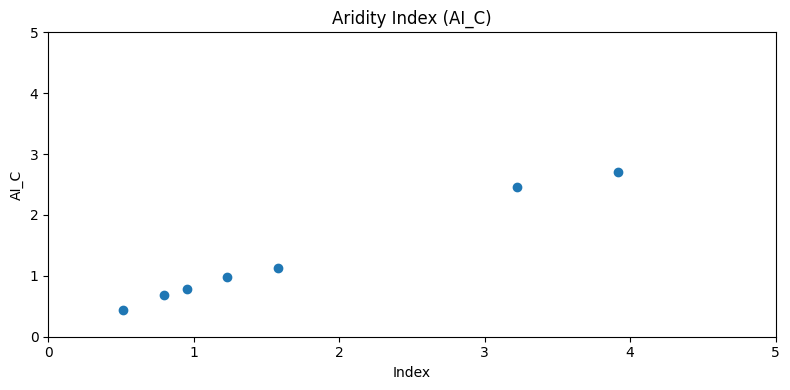

In [30]:
# Drop rows where AI_C is NaN or infinite (due to zero precipitation)
rdf_clean = rdf.replace([float("inf"), float("-inf")], pd.NA).dropna(subset=["AI_C"])

# Plot
plt.figure(figsize=(8,4))
plt.scatter(rdf_clean["AI_C"], rdf_clean["MODIS_ET"] / rdf_clean["Ameriflux_Precipitation"])
plt.xlabel("Index")
plt.ylabel("AI_C")
plt.xlim(0,5)
plt.ylim(0,5)
plt.title("Aridity Index (AI_C)")
plt.tight_layout()
plt.show()


Soil Respiration

In [5]:
# Calculate Ameriflux-based NPP using MODIS CUE and Ameriflux GPP, and store it in a new column
df["Ameriflux_NPP_C"] = df["MODIS_CUE"] * df["Ameriflux_GPP"]
df.head()

,NEONSite,FluxnetSite,Year,Month,NEON_PAR,GrowingSeason,MODIS_FPAR,MODIS_GPP,MODIS_NPP,MODIS_CUE,MODIS_ET,MODIS_PET,Ameriflux_Precipitation,Ameriflux_NEE,Ameriflux_RE,Ameriflux_GPP,Ameriflux_NPP_C
0,ABBY,US-xAB,2019,1,234.266082,0,0.511250,15812.0,NaN,NaN,NaN,NaN,5.525,0.985518,1.87615,1.080930,NaN
1,ABBY,US-xAB,2019,2,158.791374,0,0.312857,NaN,NaN,NaN,NaN,NaN,8.037,1.062960,1.42750,0.354154,NaN
2,ABBY,US-xAB,2019,3,274.517711,1,0.588750,NaN,NaN,NaN,NaN,NaN,2.682,-0.093046,3.11090,3.265210,NaN
3,ABBY,US-xAB,2019,4,239.743986,1,0.370000,NaN,NaN,NaN,NaN,NaN,7.601,0.311318,4.95291,4.502570,NaN
4,ABBY,US-xAB,2019,5,371.709899,1,0.695000,NaN,NaN,NaN,NaN,NaN,2.044,-0.352640,6.97303,7.388660,NaN
